# Visualising a dataset consisting a list of used Audi cars


### Section A - Task: 
1. Create a Pie Chart and a barplot for any categorical variable. Compare which plot is better and why? Use markdown cells to write your explanations. 
2. Make sure you have a proper title, xlabel, ylabel, xticks, yticks, and figure size which will represent an example of good data visualization.

Dataset reference: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Importing required libraries

In [1]:
# for data analysis
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [2]:
df = pd.read_csv("audi.csv")
display(df.head(15))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


In [3]:
df.info() #to see if any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


# *Pie chart of a categorical variable*

In [4]:
print(df["fuelType"].value_counts())

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64


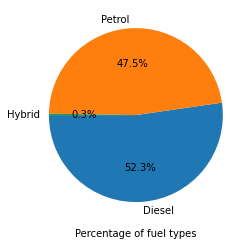

In [5]:
df["fuelType"].value_counts().plot(kind="pie", 
                                       autopct='%1.1f%%', 
                                       startangle=180)
plt.ylabel("")
plt.xlabel("Percentage of fuel types")
plt.show()

# *Barplot of a categorical variable*

In [6]:
df_fuelType = pd.DataFrame(df["fuelType"].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns={"index":"fuelType",
                                          "fuelType":"no_of_cars"})

df_fuelType["% of cars"] = (df_fuelType["no_of_cars"]/df.shape[0])*100
df_fuelType = df_fuelType.round(2)


display(df_fuelType)

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


### Final plot:

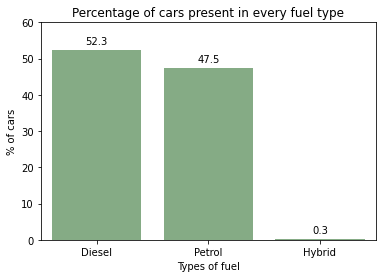

In [7]:
plot = sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="darkgreen",
            alpha=0.5)

#For adding annotations:
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in every fuel type")

plt.yticks(np.arange(0,70,10))

#show_values (plot)
plt.show()

## So the question is: Which plot is better?
I think that the barplot does a better job here in showing the percentage values of cars with a certain fuel type. This is because the hybrid portion in the pie chart is almost invisible as it covers a very less amount of area in the circle. On the other hand, in barplot there is a dedicated bar region for Hybrid cars even though it is very small. This way the barplot properly shows the presence of cars with Hybrid fuel type.



## Section B - Task:
1. Creating two scatterplots with numeric columns.
2. Creating two regression plots with numeric columns.
3. Creating a pair plot with numeric columns.
4. Then adding a categorical column as hue.

In [8]:
display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,55.4,1.4


# Analysing numerical columns with scatterplots, regression plots and pairplots




### Particular questions I would like to address by drawing plots among numerical variables:
1. Is there a correlation between the price of a car and the year it was made?
2. Is there a correlation between the price of a car and the number of miles it was driven before selling?

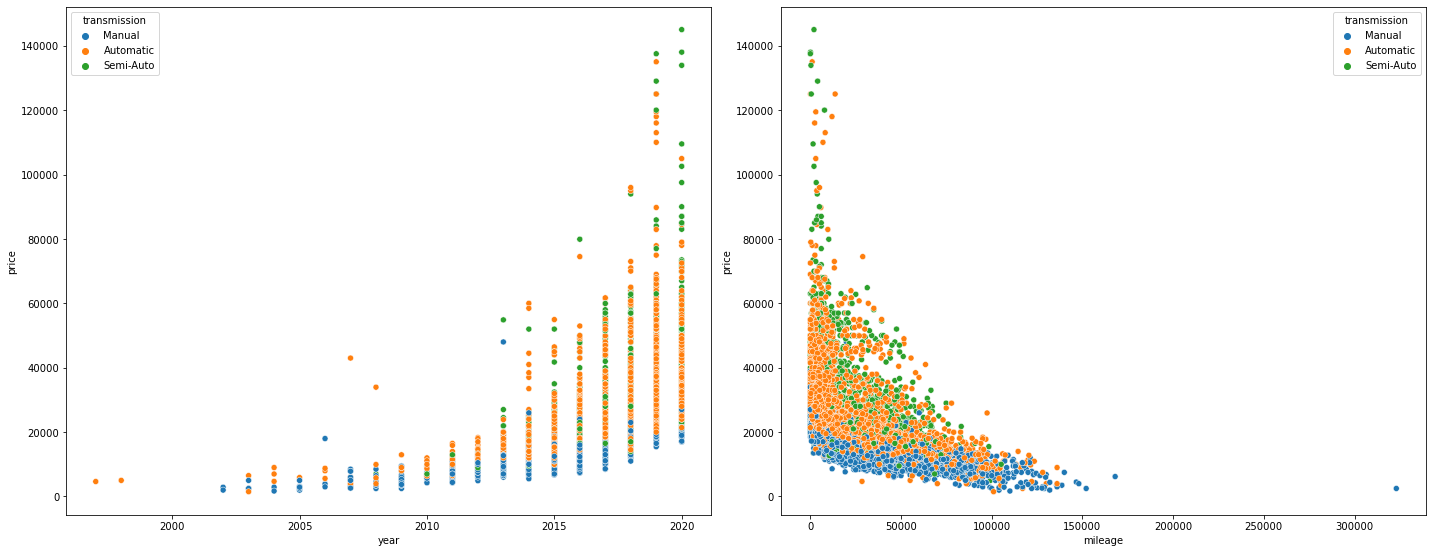

In [9]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.scatterplot(x="year", y="price", data=df, hue="transmission")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")

plt.tight_layout()
plt.show()

#### Explanation:
The scatterplot on the left shows a strong correlation between the price of the car and the year it was made. The cars made in recent years are lower priced than cars made earlier. This is logical as new cars are supposedly in a better condition. The scatterplot on the right shows a strong correlation between the price of the car and its mileage. So more miles the car has run, the lower is its price. Again this is logically true as less the cars have been used, better its condition would be. As a result, lower used cars would sell at a better price.

Lastly, transmission column has been added as a hue in order to learn how cars with certain type of transmission systems are priced. Both the scatterplots above show that manual cars have the lowest selling cost and semi-auto cars have highest price. 

All of these information together show that the car prices are influenced by their manufacturing year, mileage as well as their tranmission system.

### Understanding the data with regression plots:
After the scatterplots, we can fit a linear regression model over the plotted data. This will help us understand if there is any linear correlation between the two numerical columns plotted.

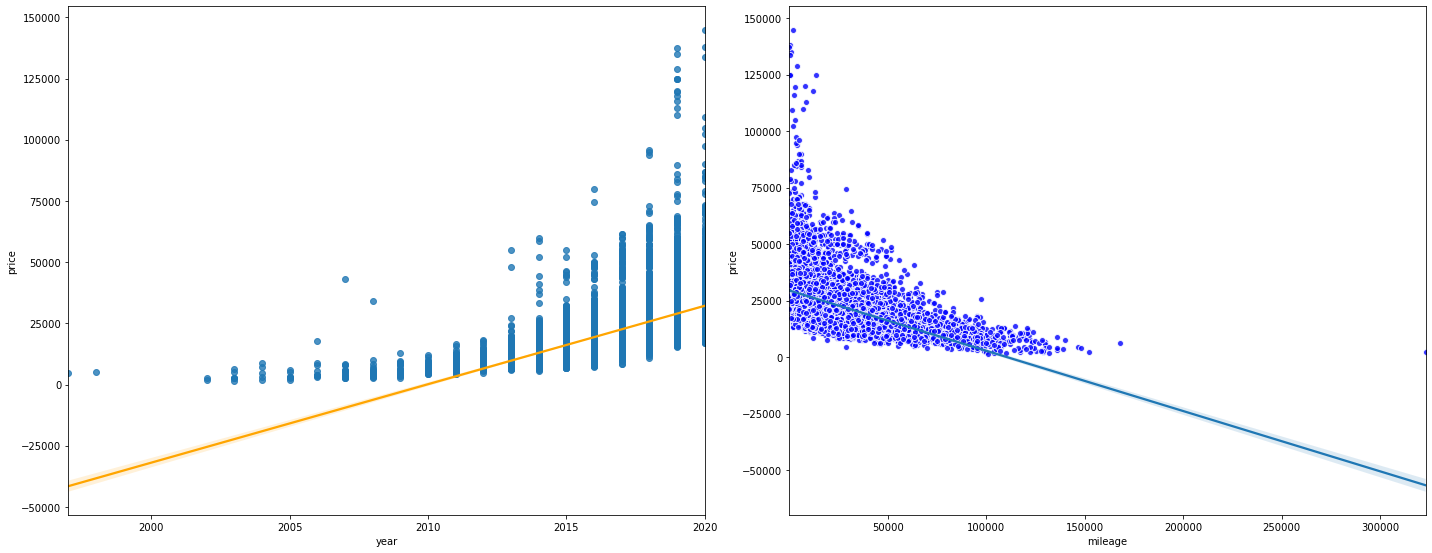

In [10]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.regplot(x="year", y="price", data=df, line_kws={"color":"orange"})

plt.subplot(2, 2, 2)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"blue", "edgecolor": "white"})


plt.tight_layout()
plt.show()

#### Explanation:
Although the regression plots above do the job of showing the positive and negative correlation of year and mileage columns with price respectively, however, the problem lies with the linear model. For these set of data, the linear model does not fit properly. Rather a curve showing the correlation would have performed better.

## Pairplots:

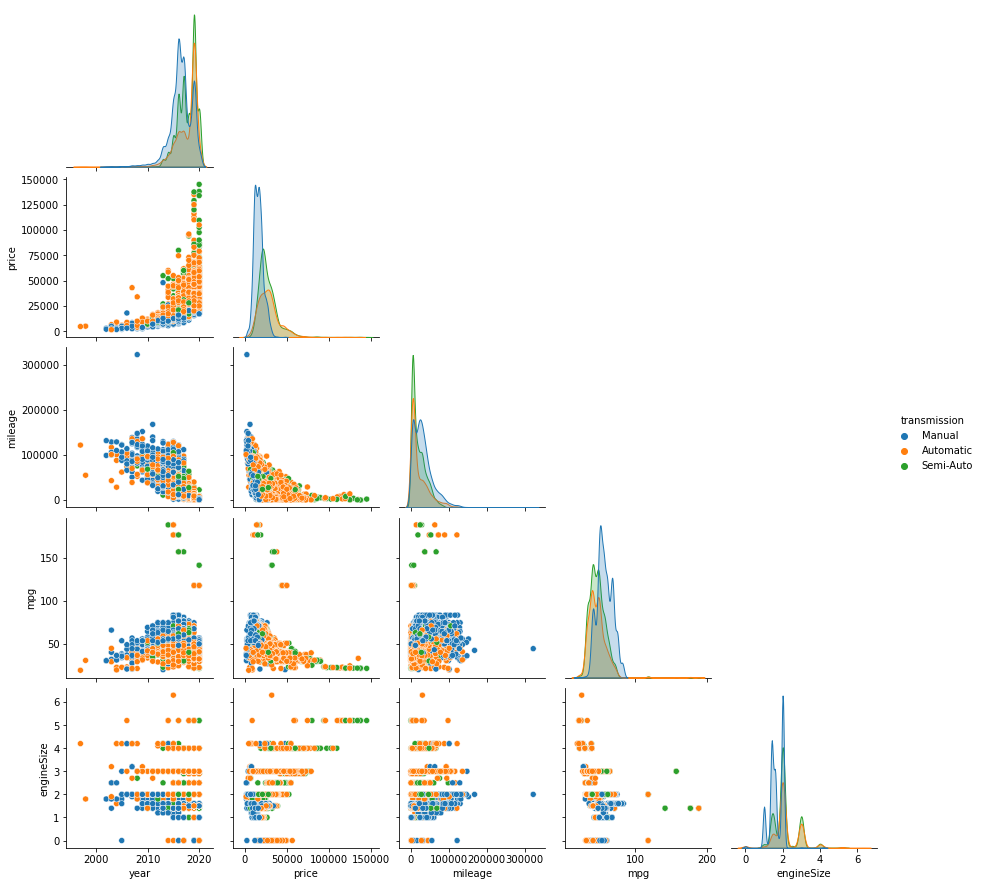

In [11]:
sns.pairplot (df, corner = True, hue = "transmission")
plt.show()

### Explanation:
The pairplots altogether show all possible pairwise scatter plots that can possibly be drawn with the existing numerical variables. Having all of them in a place can help to qualitatively analyse which two of them together show correlation. However, the pairplots are very small for us to see and decide. So it does not do a good job in giving any any information about correlation. 

However, adding the categorical feature of tranmission gives some idea on how the 3 types of transmission systems are spreaded in the plots. This is beacause the data points are now colored, which makes it easier to understand this trend.  